In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv("hn_2024_data_title_score_url_time_user_karma_50k.csv")

# Quick look
#df.head()
#df.describe()

In [2]:
min(df['score'])

1

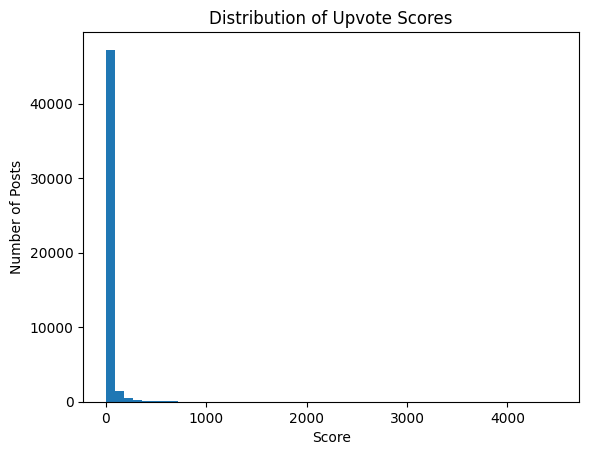

In [3]:
plt.hist(df['score'], bins=50)
plt.title("Distribution of Upvote Scores")
plt.xlabel("Score")
plt.ylabel("Number of Posts")
plt.show()

In [4]:
df['time'] = pd.to_datetime(df['time'])

In [5]:
df['time']

0       2024-02-29 16:59:00
1       2024-01-11 09:49:04
2       2024-01-08 05:29:12
3       2024-01-16 01:47:54
4       2024-01-28 04:17:53
                ...        
49995   2024-09-04 23:30:54
49996   2024-08-09 15:23:25
49997   2024-08-09 15:23:54
49998   2024-08-09 15:24:19
49999   2024-08-09 15:24:28
Name: time, Length: 50000, dtype: datetime64[ns]

In [6]:
df['time'] = pd.to_datetime(df['time'])  # in case it's not already
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.day_name()
df['month'] = df['time'].dt.month_name()

In [7]:
df['month']

0         February
1          January
2          January
3          January
4          January
           ...    
49995    September
49996       August
49997       August
49998       August
49999       August
Name: month, Length: 50000, dtype: object

C:\Users\me1dgxx\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


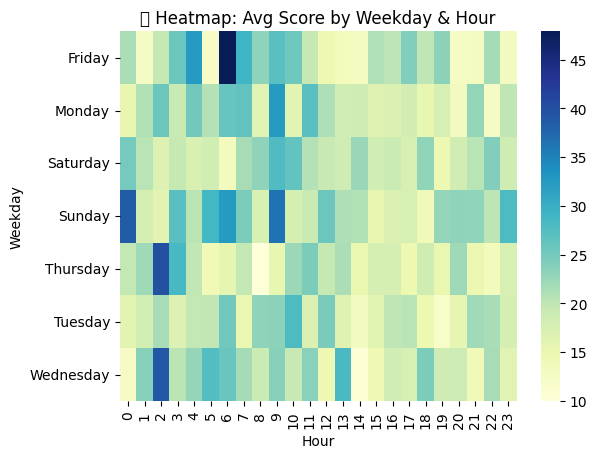

In [8]:
import seaborn as sns

heatmap_data = df.groupby(['weekday', 'hour'])['score'].mean().unstack()
sns.heatmap(heatmap_data, cmap="YlGnBu")
plt.title("🔥 Heatmap: Avg Score by Weekday & Hour")
plt.xlabel("Hour")
plt.ylabel("Weekday")
plt.show()

C:\Users\me1dgxx\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


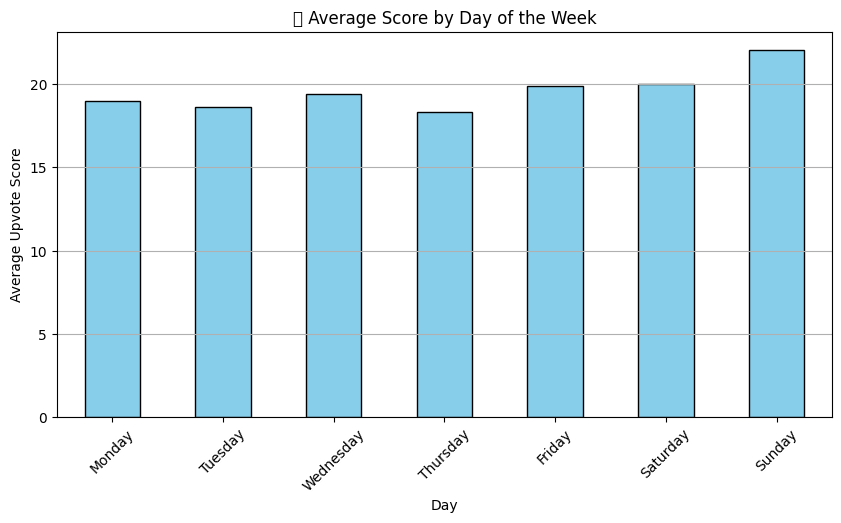

In [10]:
# Keep the days in order (not alphabetical)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by weekday and plot mean score
df.groupby('weekday')['score'].mean().reindex(weekday_order).plot(
    kind='bar',
    figsize=(10, 5),
    color='skyblue',
    edgecolor='black'
)

plt.title("📅 Average Score by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Average Upvote Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\me1dgxx\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


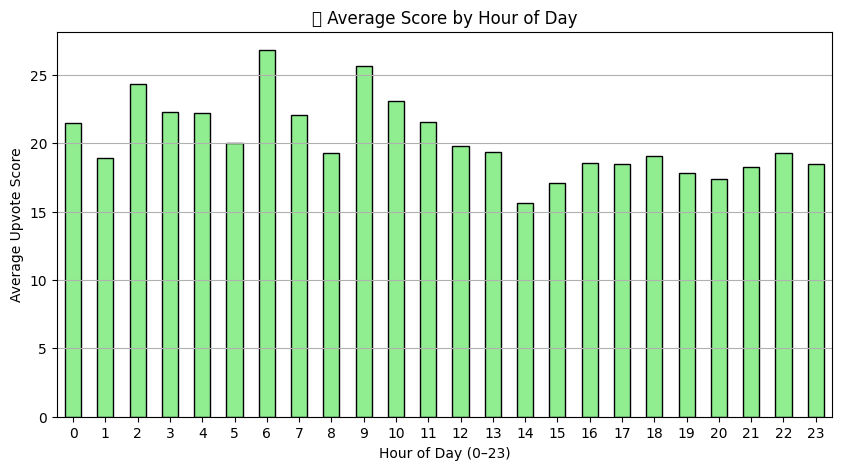

In [11]:
df.groupby('hour')['score'].mean().plot(
    kind='bar',
    figsize=(10, 5),
    color='lightgreen',
    edgecolor='black'
)

plt.title("🕒 Average Score by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Average Upvote Score")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

C:\Users\me1dgxx\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


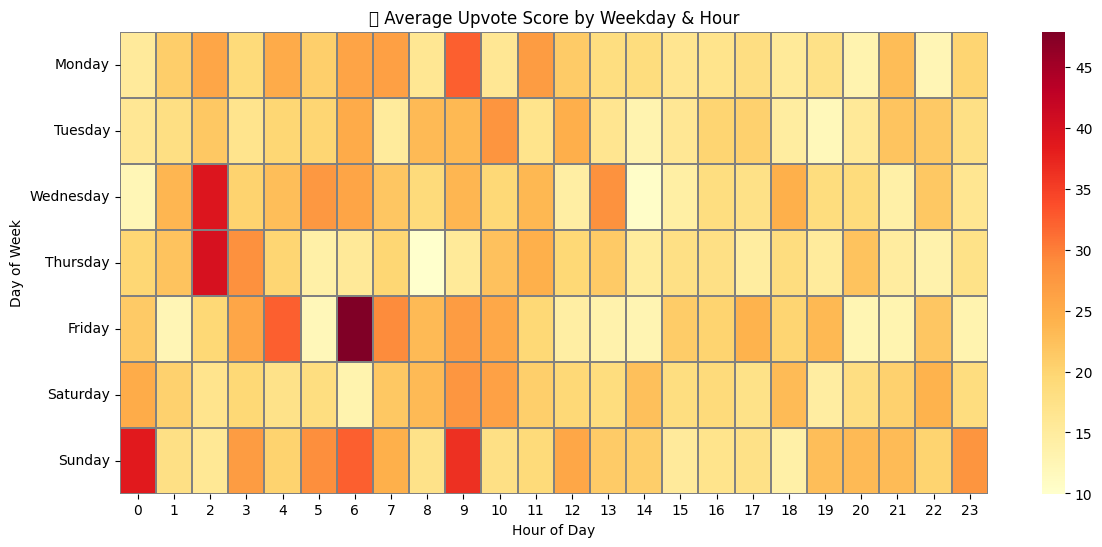

In [13]:
pivot = df.groupby(['weekday', 'hour'])['score'].mean().unstack()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(weekday_order)


plt.figure(figsize=(14, 6))
sns.heatmap(pivot, cmap='YlOrRd', linewidths=0.3, linecolor='gray')

plt.title("🔥 Average Upvote Score by Weekday & Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

In [14]:
def hour_to_block(hour):
    if 0 <= hour <= 6:
        return 'Night (0–6)'
    elif 7 <= hour <= 12:
        return 'Morning (7–12)'
    elif 13 <= hour <= 18:
        return 'Afternoon (13–18)'
    else:
        return 'Evening (19–23)'

df['hour_block'] = df['hour'].apply(hour_to_block)

C:\Users\me1dgxx\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


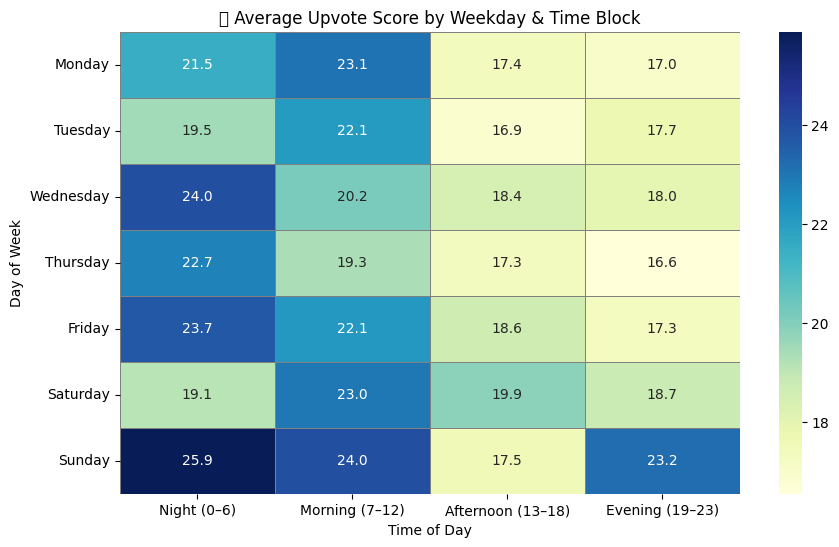

In [15]:
pivot = df.groupby(['weekday', 'hour_block'])['score'].mean().unstack()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_block_order = ['Night (0–6)', 'Morning (7–12)', 'Afternoon (13–18)', 'Evening (19–23)']

pivot = pivot.reindex(weekday_order)          # Order weekdays
pivot = pivot[hour_block_order]               # Order hour blocks

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5, linecolor='gray')

plt.title("🔥 Average Upvote Score by Weekday & Time Block")
plt.xlabel("Time of Day")
plt.ylabel("Day of Week")
plt.show()

In [17]:
# ✅ Step-by-Step: Rank Day + Time Blocks by Avg Score

pivot = df.groupby(['weekday', 'hour_block'])['score'].mean().unstack()
# Create a Series: MultiIndex of (weekday, hour_block) → average score
score_rank = df.groupby(['weekday', 'hour_block'])['score'].mean()

# Convert to a DataFrame and reset index
score_rank = score_rank.reset_index()

# Add ranking (descending = higher score = better)
score_rank['rank'] = score_rank['score'].rank(method='dense', ascending=False).astype(int)

# Sort by rank
score_rank = score_rank.sort_values('rank')


print("🔥 Top posting windows:")
print(score_rank.head(5))

print("\n❄️ Least performing time blocks:")
print(score_rank.tail(5))

🔥 Top posting windows:
      weekday       hour_block      score  rank
15     Sunday      Night (0–6)  25.882530     1
27  Wednesday      Night (0–6)  23.978937     2
14     Sunday   Morning (7–12)  23.964066     3
3      Friday      Night (0–6)  23.714932     4
13     Sunday  Evening (19–23)  23.214447     5

❄️ Least performing time blocks:
     weekday         hour_block      score  rank
16  Thursday  Afternoon (13–18)  17.343660    24
1     Friday    Evening (19–23)  17.314571    25
5     Monday    Evening (19–23)  17.038394    26
20   Tuesday  Afternoon (13–18)  16.904547    27
17  Thursday    Evening (19–23)  16.559134    28


C:\Users\me1dgxx\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127767 (\N{LAST QUARTER MOON SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


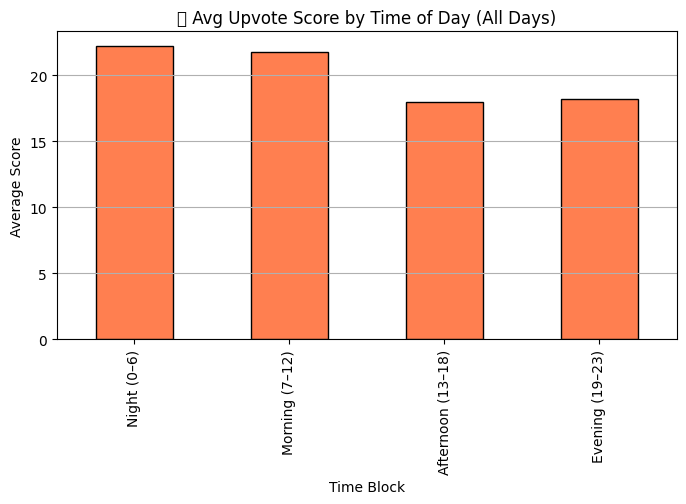

In [18]:
# Ensure 'hour_block' exists
def hour_to_block(hour):
    if 0 <= hour <= 6:
        return 'Night (0–6)'
    elif 7 <= hour <= 12:
        return 'Morning (7–12)'
    elif 13 <= hour <= 18:
        return 'Afternoon (13–18)'
    else:
        return 'Evening (19–23)'

df['hour_block'] = df['hour'].apply(hour_to_block)

# Group and plot
df.groupby('hour_block')['score'].mean().reindex([
    'Night (0–6)', 'Morning (7–12)', 'Afternoon (13–18)', 'Evening (19–23)'
]).plot(kind='bar', color='coral', edgecolor='black', figsize=(8, 4))

plt.title("🌗 Avg Upvote Score by Time of Day (All Days)")
plt.ylabel("Average Score")
plt.xlabel("Time Block")
plt.grid(axis='y')
plt.show()

C:\Users\me1dgxx\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


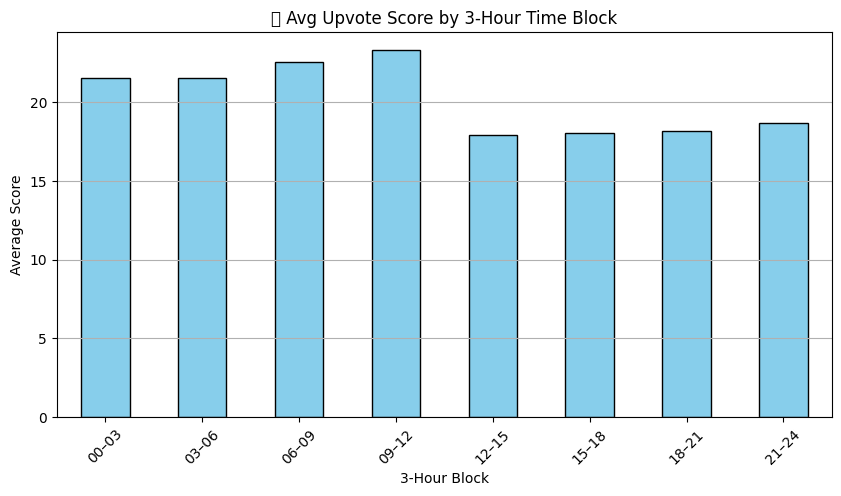

In [19]:
def hour_to_3h_block(hour):
    if 0 <= hour <= 2:
        return '00–03'
    elif 3 <= hour <= 5:
        return '03–06'
    elif 6 <= hour <= 8:
        return '06–09'
    elif 9 <= hour <= 11:
        return '09–12'
    elif 12 <= hour <= 14:
        return '12–15'
    elif 15 <= hour <= 17:
        return '15–18'
    elif 18 <= hour <= 20:
        return '18–21'
    else:
        return '21–24'

df['hour_block_3h'] = df['hour'].apply(hour_to_3h_block)

block_order_3h = ['00–03', '03–06', '06–09', '09–12', '12–15', '15–18', '18–21', '21–24']

df.groupby('hour_block_3h')['score'].mean().reindex(block_order_3h).plot(
    kind='bar', color='skyblue', edgecolor='black', figsize=(10, 5)
)

plt.title("⏰ Avg Upvote Score by 3-Hour Time Block")
plt.xlabel("3-Hour Block")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



🧮 Post counts per 3-hour block:
hour_block_3h
00–03     4270
03–06     3556
06–09     3799
09–12     4714
12–15     8133
15–18    10534
18–21     8574
21–24     6420
Name: count, dtype: int64
📊 Score and post count by time block:
               avg_score  post_count
hour_block_3h                       
00–03          21.508431        4270
03–06          21.516029        3556
06–09          22.577784        3799
09–12          23.292321        4714
12–15          17.927333        8133
15–18          18.035504       10534
18–21          18.149172        8574
21–24          18.656542        6420


C:\Users\me1dgxx\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


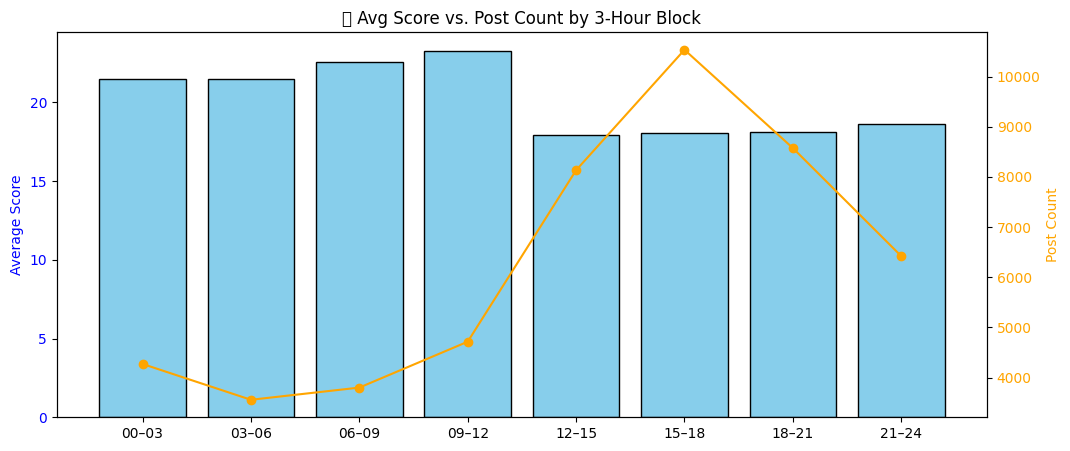

C:\Users\me1dgxx\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


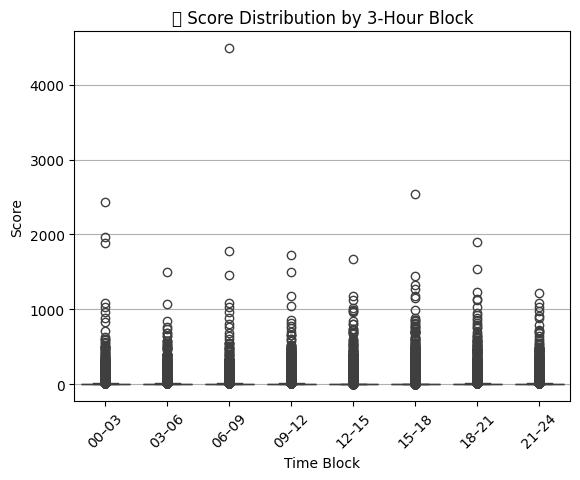

In [20]:
block_counts = df['hour_block_3h'].value_counts().reindex(block_order_3h)

print("🧮 Post counts per 3-hour block:")
print(block_counts)

# Average score per time block
avg_scores = df.groupby('hour_block_3h')['score'].mean().reindex(block_order_3h)

# Combine with post count
block_stats = pd.DataFrame({
    'avg_score': avg_scores,
    'post_count': block_counts
})

print("📊 Score and post count by time block:")
print(block_stats)

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot average scores
ax1.bar(block_stats.index, block_stats['avg_score'], color='skyblue', edgecolor='black', label='Avg Score')
ax1.set_ylabel('Average Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis for post counts
ax2 = ax1.twinx()
ax2.plot(block_stats.index, block_stats['post_count'], color='orange', marker='o', label='Post Count')
ax2.set_ylabel('Post Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title("📊 Avg Score vs. Post Count by 3-Hour Block")
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

sns.boxplot(x='hour_block_3h', y='score', data=df, order=block_order_3h)
plt.title("📦 Score Distribution by 3-Hour Block")
plt.xlabel("Time Block")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

C:\Users\me1dgxx\AppData\Local\Temp\ipykernel_10836\1530148734.py:33: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\me1dgxx\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


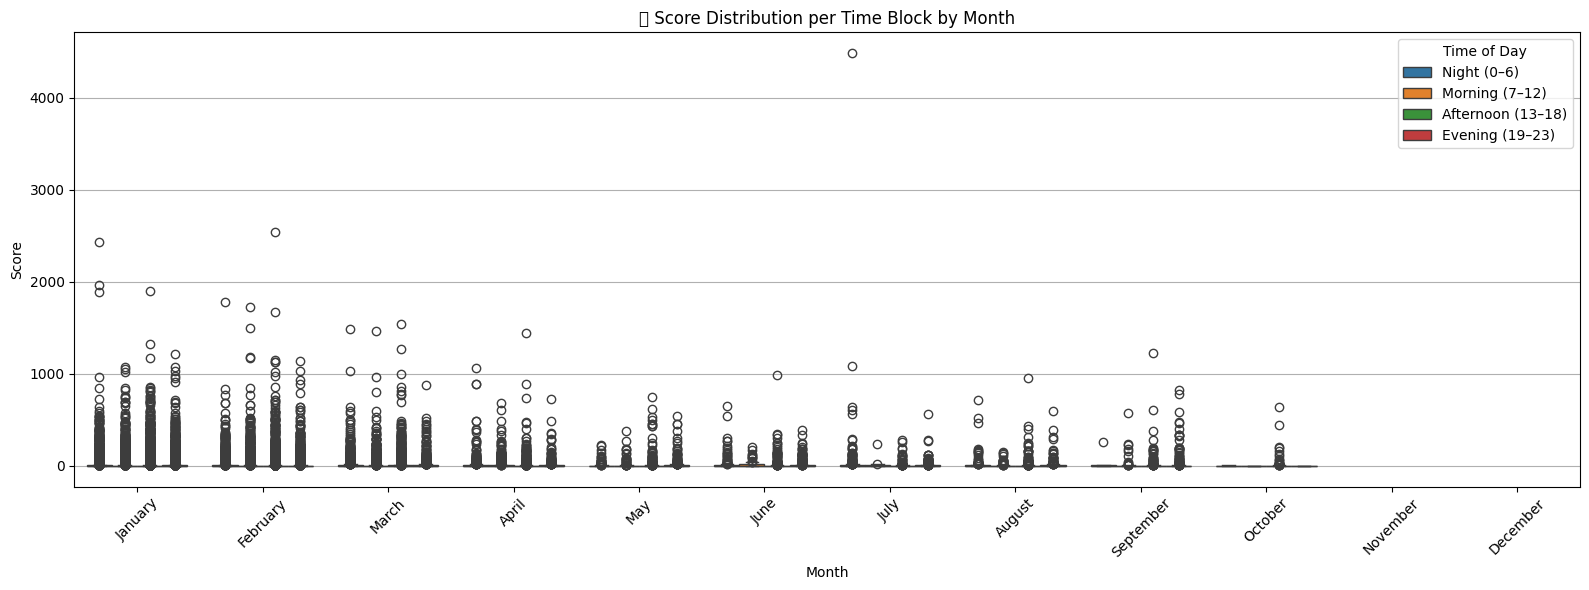

In [22]:
# Time of day block
def hour_to_block(hour):
    if 0 <= hour <= 6:
        return 'Night (0–6)'
    elif 7 <= hour <= 12:
        return 'Morning (7–12)'
    elif 13 <= hour <= 18:
        return 'Afternoon (13–18)'
    else:
        return 'Evening (19–23)'

df['hour_block'] = df['hour'].apply(hour_to_block)

plt.figure(figsize=(16, 6))
sns.boxplot(
    data=df,
    x='month',
    y='score',
    hue='hour_block',
    order=[
        'January', 'February', 'March', 'April', 'May', 'June',
        'July', 'August', 'September', 'October', 'November', 'December'
    ],
    hue_order=['Night (0–6)', 'Morning (7–12)', 'Afternoon (13–18)', 'Evening (19–23)']
)

plt.title("📊 Score Distribution per Time Block by Month")
plt.xlabel("Month")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()


C:\Users\me1dgxx\AppData\Local\Temp\ipykernel_10836\1041487298.py:30: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\me1dgxx\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


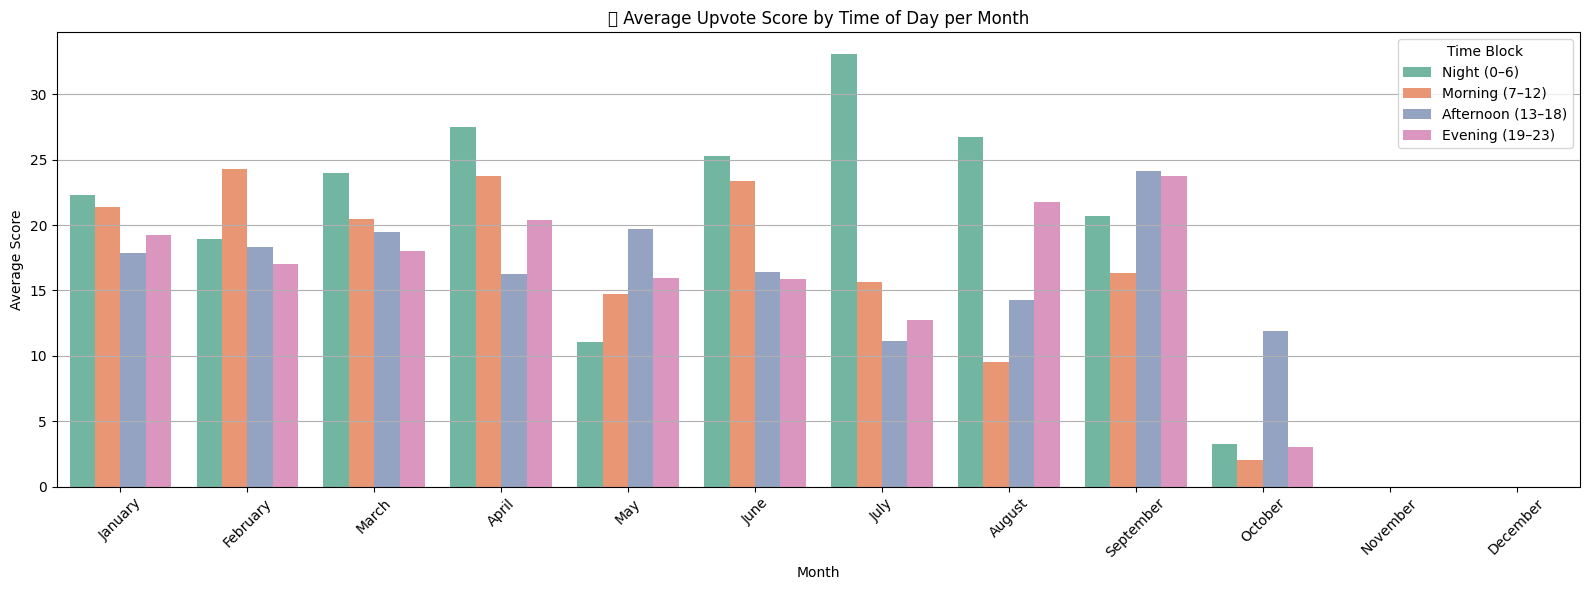

In [23]:
# Group by month + hour block and calculate mean score
grouped = df.groupby(['month', 'hour_block'])['score'].mean().reset_index()

# Ensure months are in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
hour_block_order = ['Night (0–6)', 'Morning (7–12)', 'Afternoon (13–18)', 'Evening (19–23)']

grouped['month'] = pd.Categorical(grouped['month'], categories=month_order, ordered=True)
grouped['hour_block'] = pd.Categorical(grouped['hour_block'], categories=hour_block_order, ordered=True)
grouped = grouped.sort_values(['month', 'hour_block'])


plt.figure(figsize=(16, 6))
sns.barplot(
    data=grouped,
    x='month',
    y='score',
    hue='hour_block',
    hue_order=hour_block_order,
    palette='Set2'
)

plt.title("📊 Average Upvote Score by Time of Day per Month")
plt.xlabel("Month")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.legend(title="Time Block")
plt.grid(axis='y')
plt.tight_layout()
plt.show()
